<a href="https://colab.research.google.com/github/Raghnus/coding-dojo/blob/main/Track2/MetricasClasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTCienciaDatos/PandasParaManipulacionDeDatos/Colabs/Track2/bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [ ]:
X = df.drop(columns='y_yes')
y = df['y_yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)

In [ ]:
escala = StandardScaler()
escala.fit(X_train)
X_train = escala.transform(X_train)
X_test = escala.transform(X_test)

In [ ]:
log = LogisticRegression(C=100, random_state=3, penalty='l2', solver='saga')
log.fit(X_train,y_train)
predichos = log.predict(X_test)
tn,fp,fn,tp = confusion_matrix(y_test,predichos).ravel()
precision = (tp+tn)/(tp+fp+tn+fn)
print('Precisión del modelo:',round((precision*100),2),'%')
sensibilidad = tp/(tp+fn)
print('Sensibilidad del modelo:',round((sensibilidad*100),2),'%')
especificity = tn/(tn+fp)
print('Especificidad del modelo:',round((especificity*100),2),'%')
print('AUC ROC del modelo',round((roc_auc_score(y_test,log.predict_proba(X_test)[:,1])*100),2))

Precisión del modelo: 89.48 %
Sensibilidad del modelo: 21.26 %
Especificidad del modelo: 98.11 %
AUC ROC del modelo 87.62


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


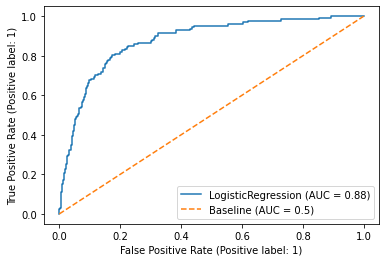

In [ ]:
plot_roc_curve(log,X_test,y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué? 

En este caso nos ayudarían más la especificidad y el area bajo la curva, pues nos ayudaría a predecir en base a las características de los clientes, a quienes no dirigir estas campañas.

Compara la precisión de tu modelo con el modelo de referencia. ¿Ves algún problema aquí?

El mayor problema en este caso es el no poder encontrar la precision del modelo de referencia, como para poder comparar.

¿De qué otras formas podrías mejorar este modelo?
Una forma que ayudaría enormemente al modelo es poder balancear las muestras, de modo que no exista tanto sesgo entre los que quieren el plan y los que no lo desean